In [11]:
with open('dataset/wiki.pkl', 'rb') as file:
    data = pickle.load(file)
    
print(sum([len(val) for key,val in data.items()]) * 1e-6)
text = ''.join([val for key,val in data.items()])
from collections import Counter
cnt = Counter()



# A quick look into the dataset
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(fr"vocab:  {''.join(chars)}")
print(f'vocab_size: {vocab_size}')


10.010883999999999
vocab:  	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡£¥§©«­®¯°±²·»¼½¾ÀÁÂÄÅÆÇÉÍÎÑÒÓÖ×ØÜÞßàáâãäåæçèéêëìíîïðñòóôõöøùúûüýĀāĂăąćČčĐđĒēĕėęěġħĩĪīĭİıĻļŁłńňŋŌōŏœřŚśŞşŠšũŪūŭůųŷźżŽžƎơƯưǎǐǒǔǝǰșțɐɑɒɔɕəɛɡɣɦɩɪɫɭɲɸɾʀʁʃʈʊʋʏʐʑʒʔʰʱʹʻʼʽʾʿˈˌː˩˹˺̤̥̩̱̲̀́̂̃̄̽̚ΓΔΕΛΞΠΣΩάέίαβγδεζηθικλμνοπρςστυφχψωόύϕЄАБВГДЕЖЗИКЛМНОПРСТУФХЧЭЯабвгдежзийклмнопрстуфхцчшщъыьэюяєіїўѣҚқҡҷӀӑәӣөԥԱՀՍաեէթկհմյնոտրւְֲִֵַָּׁבדהוחיכםמסעפרשת،ءآأإئابةتثجحخدذرزسشصضطظعغـفقكلمنهوىيًٌٍَُِّْٰٱٲپچڌڕژښکگڵہۆۇیێەܐܝܡܪހބވދސަިެްߏߒߞंःअआइईउऊऋएऐऑओऔकखगघङचछजझञटठडढणतथदधनपफबभमयरऱलळवशषसह़ािीुूृॅेैॉोौ्।॥०१२३४५६७९ॲংঅণপবমযরলষস়ািীু্ਜਪਬਾੀੰગજતરાીુଆଓଡ଼ିஅஆஎஐகஙசடணதநனபமயரறளழவாிீுெேை்గతలుెಕಡತನಳು್ംഅകഗതമയരലളസഹാിൂെേോ്ൻංලසහිทย฿ไລວາ་ཀཁགངཆཇཐདནཔཕབམཙཚཞའཡརལཤསཧཱིེོུྒྗྡྤྩྫྱྲྷတနပဘမဝသအာိုး်ြၽႃႆႇႏაგთილმრუქማርትኛአግᎩᎳᏣᐃᑎᑐᑦᒃᓄខភមរសាែ្៛ᨁᨅᨔᨕᨘᨗᱛᱟᱤᱥᱱᱲᵛḍḏḡḤḥḪḳḵḷṁṃṅṇṚṛṟṢṣṬṭṳẒẓẖạảấầẵẼẽếềệọốồộỦữἅἈἕἴἸἹὉὰὶῆῷ   ​‌‍‎‐‑–—―‘’“”„†‡•…′″‹›‿⁄⁠⁡₂₃₨₫€₭₱₹ℏℓ№℞™⅓⅔←↑→↓↔∂∑−∘∥≈≡≥⋅⋍⑪▉■◇◊★☆♯⟨⟩⟺ⰂⰍⰎⰐⰑⰔⰟⰠⰡ　、々《》「」『』【】あいうえおかがきぎくけげこごさしすそたちつてでとどなにのはびへべみめもやゆ

In [12]:
from collections import Counter


In [20]:
cnt = Counter(text)
cnt = sorted(cnt.items(), key=lambda x: x[1])

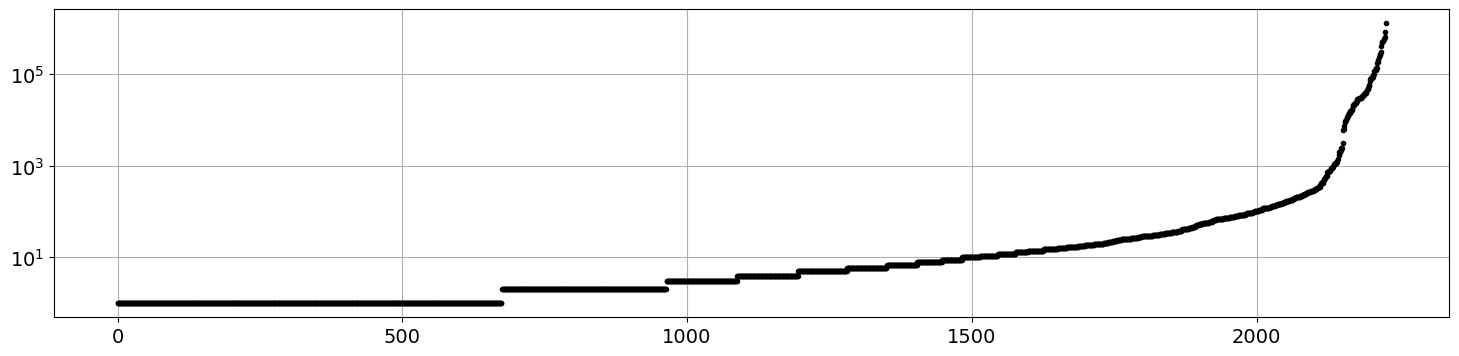

In [27]:
y = []
for a,b in cnt:
    y.append(b)

plt.semilogy(y, 'k.')
    

In [1]:
%reload_ext autoreload
%autoreload 2
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from utils.bigram import *

# read trainset
train_data, val_data, vocab_size, decode = prepare_data()

# instantiate model
model = BigramLanguageModel(vocab_size)
model = nn.DataParallel(model)
model = model.to(device) # move model parameters to gpu if available


device: cuda
vocab:  
 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
vocab_size: 65
num_params: 34M


In [2]:
# Create a pytorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)  # usually 3e-4 for bigger networks.

list_epochs, list_losses, list_epochs_eval, list_losses_eval = [0], [], [0], [] 
xb, yb = get_batch(train_data, batch_size)
logits, loss = model(xb, yb)
if device.startswith('cuda'):
    loss = loss.mean()

list_losses.append(loss.tolist())

losses = estimate_loss(model, train_data, val_data, eval_iters, -1, time.time())
list_losses_eval.append([item.detach().numpy().tolist() for item in (losses['train'], losses['val'])])

print(f'logits.shape: {logits.shape}')
print(f'loss: {loss:.3f}')
print(r''.join(decode(generate(model, torch.zeros((1,1), device=device, dtype=torch.long),
                               max_new_tokens=100)[0].tolist())))

step    -1: train_loss 4.3047, val_loss: 4.3007  (...Runtime: 0 min 20 sec)
logits.shape: torch.Size([16384, 65])
loss: 4.313

SNYYsCyaW?xbwfw:l;J.hEeaH-arqJyRniE!L'VE c
vvwb,RCGSjeN3Z.ulxZcQiSZf 
bEODZoRmYHd-iaDU'd3izefcN?zM
u


step   500: train_loss 1.9925, val_loss: 2.0902  (...Runtime: 1 min 55 sec)
step  1000: train_loss 1.5940, val_loss: 1.7809  (...Runtime: 3 min 51 sec)
step  1500: train_loss 1.4223, val_loss: 1.6252  (...Runtime: 5 min 46 sec)
step  2000: train_loss 1.3298, val_loss: 1.5661  (...Runtime: 7 min 42 sec)
step  2500: train_loss 1.2672, val_loss: 1.5316  (...Runtime: 9 min 37 sec)
step  3000: train_loss 1.2126, val_loss: 1.5158  (...Runtime: 11 min 33 sec)
step  3500: train_loss 1.1699, val_loss: 1.4993  (...Runtime: 13 min 28 sec)
step  4000: train_loss 1.1320, val_loss: 1.4833  (...Runtime: 15 min 23 sec)
step  4500: train_loss 1.0924, val_loss: 1.4837  (...Runtime: 17 min 19 sec)
step  5000: train_loss 1.0586, val_loss: 1.4879  (...Runtime: 19 min 14 sec)
step  5500: train_loss 1.0186, val_loss: 1.5070  (...Runtime: 21 min  9 sec)
step  6000: train_loss 0.9826, val_loss: 1.5276  (...Runtime: 23 min  3 sec)
step  6500: train_loss 0.9501, val_loss: 1.5430  (...Runtime: 24 min 58 sec)
step

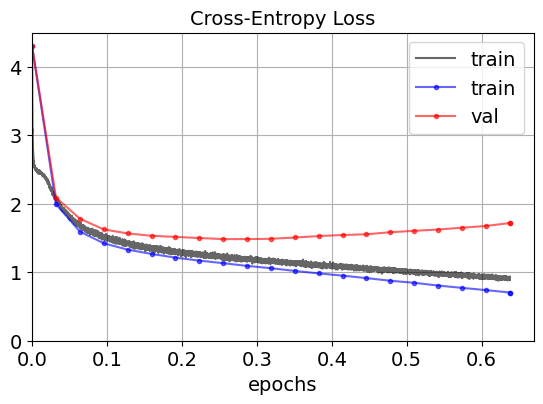

In [3]:
# train loop
start = time.time()
epoch = 0

for ib in range(1, max_iters + 1):
    # sample a batch of data
    xb, yb = get_batch(train_data, batch_size)
    
    # evaluate the loss
    logits, loss = model(xb, yb)
    if device.startswith('cuda'):
        loss = loss.mean()
    optimizer.zero_grad(set_to_none=True)
    loss.backward() # get the gradients
    optimizer.step() # update parameters using the gradients
    
    # evaluate at fixed intervals
    epoch += batch_size / (len(train_data)-batch_size)
    if ib % eval_interval == 0 or ib == max_iters - 1:
        losses = estimate_loss(model, train_data, val_data, eval_iters, ib, start)
        list_epochs_eval.append(epoch)
        list_losses_eval.append([item.detach().numpy().tolist() for item in (losses['train'], losses['val'])])
    list_losses.append(loss.item())
    list_epochs.append(epoch)
    
plotter(list_epochs, list_losses, list_epochs_eval, list_losses_eval)

# Generate text 
context = torch.zeros((1,1), dtype=torch.long, device=device)
print(r''.join(decode(generate(model, torch.zeros((1,1), device=device, dtype=torch.long), 
                               max_new_tokens=400)[0].tolist()))) 

# The Mathematical Trick in Self-Attention

- Attention is a **communication mechanism**. It's anodes in a graph looking at each other and aggregating informtaion with a weighted sum from all nodes pointing to them  

- No notion of space. Attention itself only acts over nodes and vectors.

- Separate batches don't talk to each other. Each example across batch dimension is processed independently. 

- **Encoder:**  No masking with `tril` allowing all tokens to communicate. **Decoder** uses masking in an autoregressive settings so past tokens don't talk to future tokens --otherwise they would give away the answer.

- **Self-Attention:** keys, queries and values arecome from the same source. 
- **Cross-Attention:** queries are produced from x, keys and values are produced from a previous encoder module. Encoder encodes some context we want the decoder's generation process to be conditioned on.
- **Scaling by sqrt(d):** It's an important normalization to have. 
